# Image Classification

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [10]:
# Load and preprocess the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("Original shapes:")
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


Original shapes:
x_train shape: (60000, 28, 28)
y_train shape: (60000,)


In [11]:
x_train = x_train.reshape((-1, 28, 28, 1)) / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)) / 255.0

print("Shapes after reshaping x_train and x_test:")
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

Shapes after reshaping x_train and x_test:
x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [12]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

print("Shapes after converting y_train and y_test to categorical:")
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Shapes after converting y_train and y_test to categorical:
y_train shape: (60000, 10)
y_test shape: (10000, 10)


In [5]:

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [6]:

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [7]:

# Train the model and keep track of training history
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
750/750 [==============================] - 32s 38ms/step - loss: 0.6315 - accuracy: 0.7718 - val_loss: 0.4019 - val_accuracy: 0.8530
Epoch 2/10
750/750 [==============================] - 28s 37ms/step - loss: 0.4202 - accuracy: 0.8491 - val_loss: 0.3505 - val_accuracy: 0.8712
Epoch 3/10
750/750 [==============================] - 28s 37ms/step - loss: 0.3698 - accuracy: 0.8677 - val_loss: 0.3267 - val_accuracy: 0.8776
Epoch 4/10
750/750 [==============================] - 28s 37ms/step - loss: 0.3355 - accuracy: 0.8800 - val_loss: 0.2874 - val_accuracy: 0.8917
Epoch 5/10
750/750 [==============================] - 28s 37ms/step - loss: 0.3137 - accuracy: 0.8875 - val_loss: 0.2824 - val_accuracy: 0.8996
Epoch 6/10
750/750 [==============================] - 28s 37ms/step - loss: 0.2899 - accuracy: 0.8941 - val_loss: 0.2655 - val_accuracy: 0.9020
Epoch 7/10
750/750 [==============================] - 26s 35ms/step - loss: 0.2708 - accuracy: 0.9015 - val_loss: 0.2538 - val_accuracy:

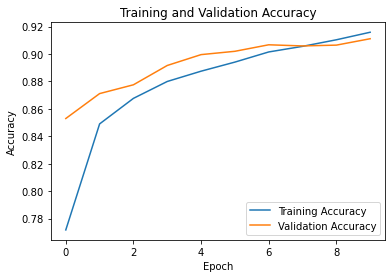

In [8]:

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [9]:

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")


313/313 [==============================] - 2s 8ms/step - loss: 0.2627 - accuracy: 0.9062
Test accuracy: 0.9061999917030334
